# Лабораторная работа № 2. Выполнил Гришин Степан

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot

Импортируем данные

In [2]:
data = pd.read_csv('desktop/CompanyABCprofit.csv')

Данные отображают доходность некоторой компании в зависимости от года в некоторой валюте

In [3]:
data

,Year,Profit(Rs '000)
0,1821,1645
1,1822,658
2,1823,1926
3,1824,865
4,1825,764
...,...,...
195,2016,988
196,2017,895
197,2018,-178
198,2019,543


Поменяем название столбца

In [16]:
data.rename(columns = {"Profit(Rs '000)": 'Profit'}, inplace = True)

Посмотрим на распределение

<AxesSubplot:xlabel='Profit', ylabel='Density'>

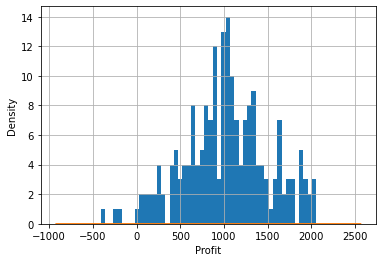

In [30]:
data['Profit'].hist(bins = 50)

Изобразим распределение с аппроксимацией

<AxesSubplot:xlabel='Profit', ylabel='Count'>

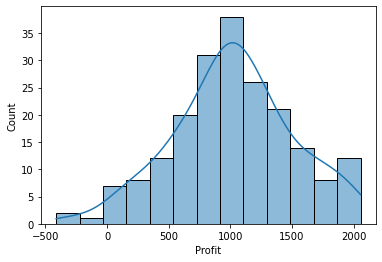

In [34]:
sns.histplot(data['Profit'], kde = True)

Загрузим нормальное распределение из предыдущей работы

In [32]:
d = pd.read_csv('Desktop/customer_churn_data.csv')

Посмотрим на него

<AxesSubplot:xlabel='Age', ylabel='Count'>

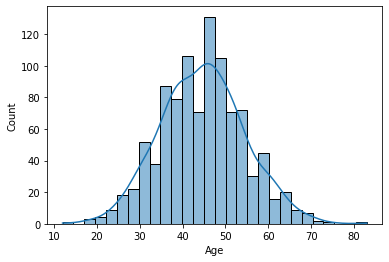

In [36]:
ax = sns.histplot(d, x = "Age", kde=True)
ax

Создадим таблицу, в которой будут указаны параметры

In [47]:
from scipy.stats import skew
import scipy
d1 = {"Распределения":["Близкое к нормальному 1 лр","Близкое к нормальному 2 лр"], "Матожидание":[d['Age'].mean(), data['Profit'].mean()],
     "Дисперсия": [np.var(d['Age']), np.var(data['Profit'])],"Ассиметрия":[skew(d['Age']), skew(data['Profit'])], "Эксцесс": [scipy.stats.kurtosis(d['Age']),scipy.stats.kurtosis(data['Profit']) ],
     "Квантиль 0.05":[d['Age'].quantile(0.05),data['Profit'].quantile(0.05)],"Квантиль 0.95": [d['Age'].quantile(0.95),data['Profit'].quantile(0.95)],"Квантиль 0.025": [d['Age'].quantile(0.025),data['Profit'].quantile(0.025)]}

dd = pd.DataFrame(d1)
dd

,Распределения,Матожидание,Дисперсия,Ассиметрия,Эксцесс,Квантиль 0.05,Квантиль 0.95,Квантиль 0.025
0,Близкое к нормальному 1 лр,44.674,95.899724,0.110433,0.057401,29.0,61.0,26.0
1,Близкое к нормальному 2 лр,1021.990,236910.189900,-0.127933,-0.076597,203.4,1898.2,60.7


Сгенерируем нормальное распределение, с параметрами нашего распределения

In [53]:
raspr = np.random.normal(loc = data['Profit'].mean(), scale = np.sqrt(np.var(data['Profit'])),size = 1000 )


Построим его и сравним с оригиналом

<AxesSubplot:xlabel='Profit', ylabel='Count'>

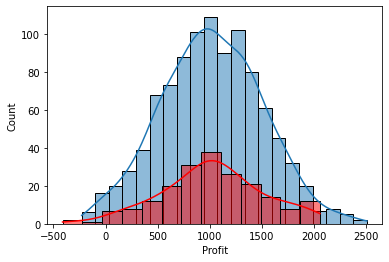

In [61]:
sns.histplot(raspr, kde = True)
sns.histplot(data, x = "Profit", kde=True, color = "r")


Данные распределения похожи, но не равны, так как в сгенерированной выборке данных больше, чем в исходной, поэтому сгенерированное распределение больше исходного.